In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_hub as hub
import tensorflow_datasets as tfds

from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
import keras
from keras.applications.mobilenet import MobileNet

from sklearn.metrics import confusion_matrix
from keras.layers.core import Dense, Activation
from keras.metrics import categorical_crossentropy
from keras.metrics import binary_crossentropy
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf
from keras.preprocessing import image

In [ ]:
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.3,
    zoom_range = 0.3,
    horizontal_flip = True,
)
validation_datagen = image.ImageDataGenerator(
    rescale = 1./255
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Brain Tumar Data set/Dataset/New folder (2)/Train',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

validation = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/Brain Tumar Data set/Dataset/New folder (2)/Validation',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

test = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/Brain Tumar Data set/Dataset/New folder (2)/Test',
    target_size = (224, 224),
    batch_size = 32,
    shuffle = False,
    class_mode = 'categorical'
)

Found 2180 images belonging to 3 classes.
Found 306 images belonging to 3 classes.
Found 629 images belonging to 3 classes.


In [ ]:
VGG16 = tf.keras.applications.VGG16(
    include_top=False, 
    weights = 'imagenet', 
    input_shape=(224,224,3),
    )

In [ ]:
VGG16.trainable = False

In [ ]:
model = tf.keras.models.Sequential([
  VGG16,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.8),
  tf.keras.layers.Dense(units=1024, activation='relu'),
  tf.keras.layers.Dense(units=512, activation='relu'),
  tf.keras.layers.Dense(units=3, activation='softmax'), 
])

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dropout_1 (Dropout)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 1024)              25691136  
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dense_5 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 40,932,163
Trainable params: 26,217,475


In [ ]:
history = model.fit(
    x = train, 
    validation_data = validation,
    epochs = 20
)

Epoch 1/20
69/69 [==============================] - 1405s 20s/step - loss: 1.3138 - accuracy: 0.5991 - val_loss: 0.7180 - val_accuracy: 0.6471
Epoch 2/20
69/69 [==============================] - 1355s 20s/step - loss: 0.6346 - accuracy: 0.7225 - val_loss: 0.7495 - val_accuracy: 0.6438
Epoch 3/20
69/69 [==============================] - 1352s 20s/step - loss: 0.5711 - accuracy: 0.7573 - val_loss: 0.9296 - val_accuracy: 0.5523
Epoch 4/20
69/69 [==============================] - 1352s 20s/step - loss: 0.4951 - accuracy: 0.7936 - val_loss: 0.7767 - val_accuracy: 0.6503
Epoch 5/20
69/69 [==============================] - 1383s 20s/step - loss: 0.4708 - accuracy: 0.8083 - val_loss: 0.8832 - val_accuracy: 0.5915
Epoch 6/20
69/69 [==============================] - 1344s 19s/step - loss: 0.4528 - accuracy: 0.8165 - val_loss: 1.1973 - val_accuracy: 0.5163
Epoch 7/20
69/69 [==============================] - 1336s 19s/step - loss: 0.4405 - accuracy: 0.8128 - val_loss: 0.9490 - val_accuracy: 0.5752

In [ ]:
# Evaluate the loss and accuracy
loss, accuracy = model.evaluate(test)

# Print the accuracy
print("Accuracy: " + str(accuracy))
# Print the loss
print("Loss: " + str(loss))

20/20 [==============================] - 341s 17s/step - loss: 0.4897 - accuracy: 0.8108
Accuracy: 0.8108108043670654
Loss: 0.48971304297447205


In [ ]:
test.class_indices

{'glioma': 0, 'meningioma': 1, 'pituitary_tumor': 2}

In [ ]:
import numpy as np
from sklearn import metrics

predictions = model.predict(test)
predicted_classes = np.argmax(predictions, axis = 1)
true_classes = test.classes
class_labels = ['glioma', 'meningioma', 'pituitary_tumor']
report = metrics.classification_report(true_classes, predicted_classes, target_names = class_labels)
print(report)

20/20 [==============================] - 335s 17s/step
                 precision    recall  f1-score   support

         glioma       0.92      0.80      0.85       291
     meningioma       0.63      0.65      0.64       152
pituitary_tumor       0.81      0.96      0.88       186

       accuracy                           0.81       629
      macro avg       0.79      0.80      0.79       629
   weighted avg       0.82      0.81      0.81       629



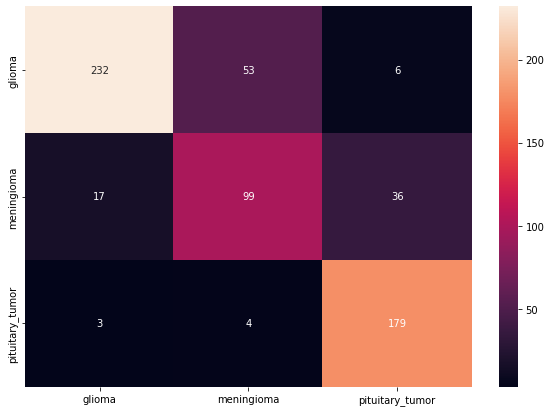

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(true_classes, predicted_classes)
df_cm = pd.DataFrame(cm, index = [i for i in ['glioma', 'meningioma', 'pituitary_tumor']],
                  columns = [i for i in ['glioma', 'meningioma', 'pituitary_tumor']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='d')

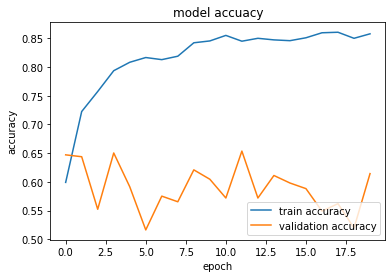

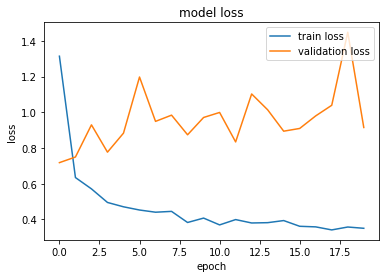

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuacy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
plt.show()